# Joint feature selection with multi-task Lasso

同时执行2个 回归， 即系数，y，x  shape都扩大了


# Generate data

In [36]:
import numpy as np
rng = np.random.RandomState(42)

In [37]:
n_samples, n_features, n_tasks = 100, 30, 40
n_relevant_features = 5
coef = np.zeros((n_tasks, n_features))
times = np.linspace(0, 2 * np.pi, n_tasks)
for k in range(n_relevant_features):
    coef[:, k] = np.sin((1.0 + rng.randn(1)) * times + 3 * rng.randn(1))

X = rng.randn(n_samples, n_features)
Y = np.dot(X, coef.T) + rng.randn(n_samples, n_tasks)

# Fit models

In [38]:
from sklearn.linear_model import Lasso,MultiTaskLasso
# 分别训练每个任务

coef_lasso_ = np.array(
    [Lasso(alpha=0.5).fit(X, y).coef_ for y in Y.T] # 每个任务的 样本训练
)
coef_multi_task_lasso_ = MultiTaskLasso(alpha=1.0).fit(X,Y).coef_

In [39]:
print(coef_lasso_.shape, coef_multi_task_lasso_.shape)

(40, 30) (40, 30)


# PLOT

对比 分别Lasso和 mulittask Lasso

Text(0.5, 0.98, 'Coefficient non-zero location')

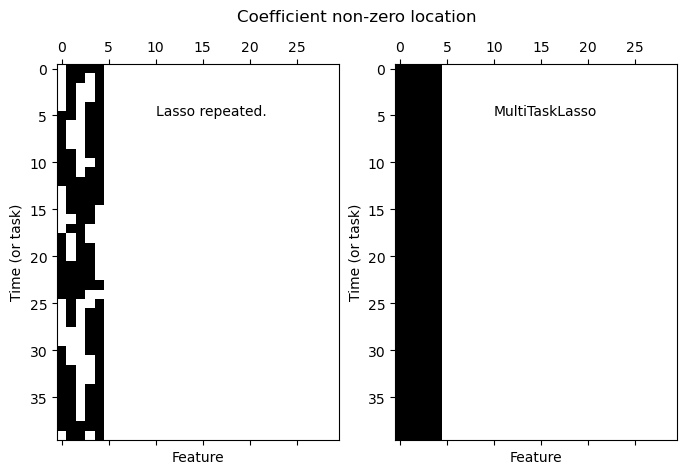

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.spy(coef_lasso_) # spy可视化稀疏矩阵,空白为系数0
plt.xlabel('Feature')
plt.ylabel('Time (or task)')
plt.text(10,5, 'Lasso repeated.')
plt.subplot(1,2,2)
plt.spy(coef_multi_task_lasso_)
plt.xlabel('Feature')
plt.ylabel('Time (or task)')
plt.text(10, 5, "MultiTaskLasso")
fig.suptitle('Coefficient non-zero location')


1. 可以看到 对于那些0系数特征 都正确回归成0了。
2. 至于非0系数特征，Lasso回归为0， 而multimasklasso不是。

观察一个特征的系数 在多任务情况下对比。 multimasklasso应该更好

(-1.1, 1.1)

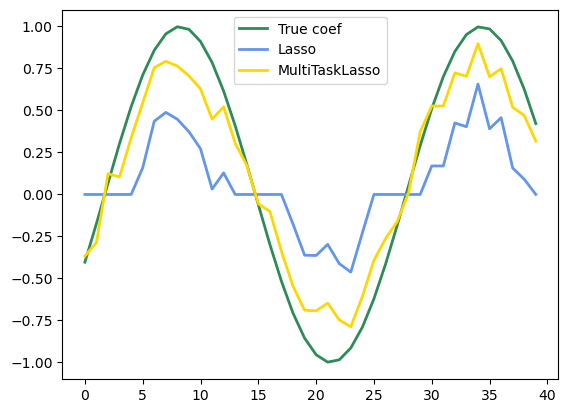

In [42]:

feature_to_plot = 0
plt.figure()
lw = 2
plt.plot(coef[:, feature_to_plot], color="seagreen", linewidth=lw, label="True coef")
plt.plot(
    coef_lasso_[:, feature_to_plot], color="cornflowerblue", linewidth=lw, label="Lasso"
)
plt.plot(
    coef_multi_task_lasso_[:, feature_to_plot],
    color="gold",
    linewidth=lw,
    label="MultiTaskLasso",
)
plt.legend(loc="upper center")
plt.axis("tight")
plt.ylim([-1.1, 1.1])